<a href="https://colab.research.google.com/github/JongBeomPark78/DAP/blob/main/Data_Analysis_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터분석프로그래밍 기말 프로젝트
이번 데이터분석프로그래밍 과제로는 data.world 사이트에서 찾은 Sales 데이터를 찾아서 사용을 했습니다. https://data.world/bobmajor/sales 

이번 데이터분석프로그래밍 과제의 목표는 무작위로 섞여 있는 데이터들 사이에서 유의미한 데이터를 도출하는 것 입니다. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as plt
import io 
from google.colab import files
myfile = files.upload()

Saving 5000 Sales Records.csv to 5000 Sales Records.csv


# Descritive Statistics

데이터 분석을 시작하기 전에 사용하는 데이터에 대한 분석을 진행했습니다.
1. 해당 데이터에 결측치가 존재 여부 확인
2. 해당 데이터의 구성 확인
3. 해당 데이터의 간단한 통계정보 확인 


In [ ]:
data = pd.read_csv(io.BytesIO(myfile['5000 Sales Records.csv']))
data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [ ]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online,M,12/20/2013,957081544,1/11/2014,552,255.28,159.42,140914.56,87999.84,52914.72
1,Central America and the Caribbean,Panama,Snacks,Offline,C,7/5/2010,301644504,7/26/2010,2167,152.58,97.44,330640.86,211152.48,119488.38
2,Europe,Czech Republic,Beverages,Offline,C,9/12/2011,478051030,9/29/2011,4778,47.45,31.79,226716.10,151892.62,74823.48
3,Asia,North Korea,Cereal,Offline,L,5/13/2010,892599952,6/15/2010,9016,205.70,117.11,1854591.20,1055863.76,798727.44
4,Asia,Sri Lanka,Snacks,Offline,C,7/20/2015,571902596,7/27/2015,7542,152.58,97.44,1150758.36,734892.48,415865.88


In [ ]:
data.describe(include=[object])

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date
count,5000,5000,5000,5000,5000,5000,5000
unique,7,185,12,2,4,2305,2320
top,Europe,Andorra,Fruits,Offline,M,6/26/2010,3/15/2010
freq,1330,40,447,2504,1321,7,7


In [ ]:
data['Region'].unique()

array(['Central America and the Caribbean', 'Europe', 'Asia',
       'Middle East and North Africa', 'Australia and Oceania',
       'Sub-Saharan Africa', 'North America'], dtype=object)

# Data visualization
데이터 시각화의 목표로는 
1. 데이터의 지역별 비중 확인.
2. 각 지역별 년도에 따른 총 수익(Total Revenue), 총 비용(Total Cost), 총 이윤 (Totol Profit)의 변화량 확인.
입니다.

"1. 데이터의 지역별 비중 확인" 을 해결하기 위해서는 groupby를 사용해서 데이터를 "Region" column에 기반하여 분할을 했습니다. 그 후 파이 차트를 사용해서 시각화를 했습니다. 

"2. 각 지역별 년도에 따른 총 수익(Total Revenue), 총 비용(Total Cost), 총 이윤 (Totol Profit)의 변화량 확인." 을 구현하기 위해서 
1. 년도 column을 생성을 위해서 "Order Date"의 데이터 타입을 datetime으로 변경. 
2. Index를 "Order Date" 으로 변경 후 year column을 추출
3. year, Total Revenue, Total Cost, Total Profit을 사용하여 bar plot을 생성. 

과정을 진행했습니다. 


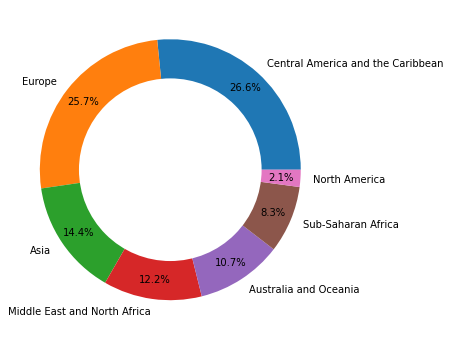

In [ ]:
import matplotlib.pyplot as plt
RegionCount = data['Region'].value_counts()
fig, ax = plt.subplots(figsize=(6,6))

ax.pie(RegionCount, 
       labels=['Central America and the Caribbean', 'Europe', 'Asia', 'Middle East and North Africa', 'Australia and Oceania', 'Sub-Saharan Africa', 'North America'], 
       
       autopct='%.1f%%',pctdistance=0.85)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

In [ ]:
groups = data.groupby(data.Region)
CA_C = groups.get_group("Central America and the Caribbean")
EU = groups.get_group("Europe")
Asia = groups.get_group("Asia")
ME_NA = groups.get_group("Middle East and North Africa")
Aus_Ocean = groups.get_group("Australia and Oceania")
SSAf = groups.get_group("Sub-Saharan Africa")
NA = groups.get_group("North America")

In [ ]:
CA_C.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 534 entries, 2013-12-20 to 2013-06-30
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          534 non-null    object 
 1   Country         534 non-null    object 
 2   Item Type       534 non-null    object 
 3   Sales Channel   534 non-null    object 
 4   Order Priority  534 non-null    object 
 5   Order ID        534 non-null    int64  
 6   Ship Date       534 non-null    object 
 7   Units Sold      534 non-null    int64  
 8   Unit Price      534 non-null    float64
 9   Unit Cost       534 non-null    float64
 10  Total Revenue   534 non-null    float64
 11  Total Cost      534 non-null    float64
 12  Total Profit    534 non-null    float64
 13  year            534 non-null    int64  
dtypes: float64(5), int64(3), object(6)
memory usage: 62.6+ KB


In [ ]:
CA_C.describe(include=[object])

,Region,Country,Item Type,Sales Channel,Order Priority,Ship Date
count,534,534,534,534,534,534
unique,1,20,12,2,4,485
top,Central America and the Caribbean,Haiti,Meat,Offline,H,6/12/2016
freq,534,36,55,271,146,3


In [ ]:
CA_C['Order Date'] = pd.to_datetime(CA_C['Order Date']) #Order Date의 데이터 타입을 object에서 datetime으로 변경.
CA_C.set_index('Order Date', inplace=True) #인덱스를 Order Date로 변경.
CA_C['year']=CA_C.index.year  #index의 year들을 column으로 추가. 

EU['Order Date'] = pd.to_datetime(EU['Order Date']) #Order Date의 데이터 타입을 object에서 datetime으로 변경.
EU.set_index('Order Date', inplace=True) #인덱스를 Order Date로 변경.
EU['year']=EU.index.year #index의 year들을 column으로 추가. 

Asia['Order Date'] = pd.to_datetime(Asia['Order Date']) #Order Date의 데이터 타입을 object에서 datetime으로 변경.
Asia.set_index('Order Date', inplace=True) #인덱스를 Order Date로 변경.
Asia['year']=Asia.index.year #index의 year들을 column으로 추가. 

ME_NA['Order Date'] = pd.to_datetime(ME_NA['Order Date']) #Order Date의 데이터 타입을 object에서 datetime으로 변경.
ME_NA.set_index('Order Date', inplace=True) #인덱스를 Order Date로 변경.
ME_NA['year']=ME_NA.index.year #index의 year들을 column으로 추가. 

Aus_Ocean['Order Date'] = pd.to_datetime(Aus_Ocean['Order Date']) #Order Date의 데이터 타입을 object에서 datetime으로 변경.
Aus_Ocean.set_index('Order Date', inplace=True) #인덱스를 Order Date로 변경.
Aus_Ocean['year']=Aus_Ocean.index.year #index의 year들을 column으로 추가. 

SSAf['Order Date'] = pd.to_datetime(SSAf['Order Date']) #Order Date의 데이터 타입을 object에서 datetime으로 변경.
SSAf.set_index('Order Date', inplace=True) #인덱스를 Order Date로 변경.
SSAf['year']=SSAf.index.year #index의 year들을 column으로 추가. 

NA['Order Date'] = pd.to_datetime(NA['Order Date']) #Order Date의 데이터 타입을 object에서 datetime으로 변경.
NA.set_index('Order Date', inplace=True) #인덱스를 Order Date로 변경.
NA['year']=NA.index.year #index의 year들을 column으로 추가. 



KeyError: ignored

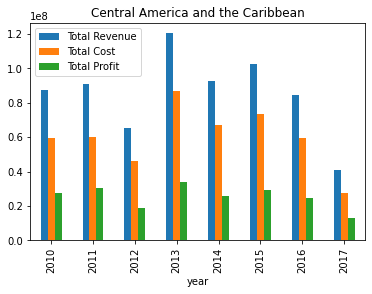

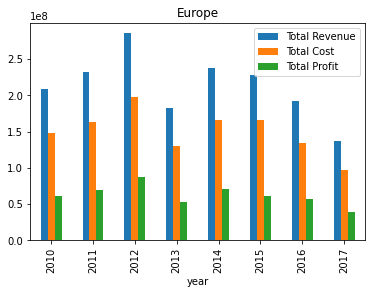

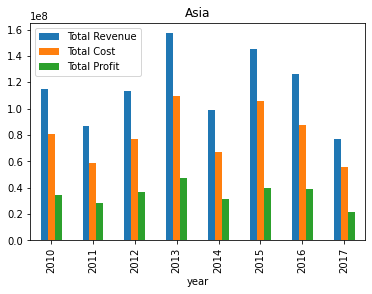

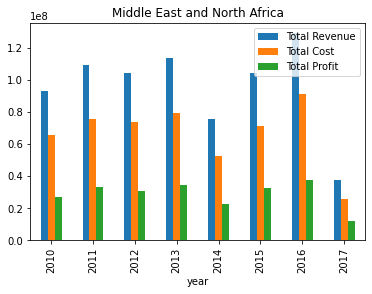

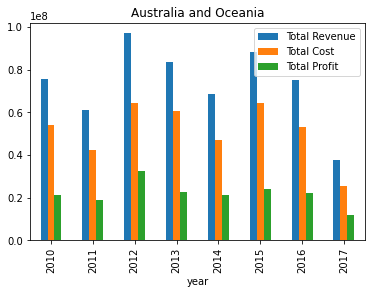

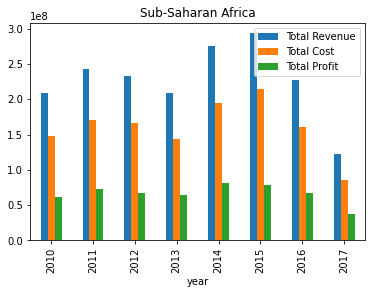

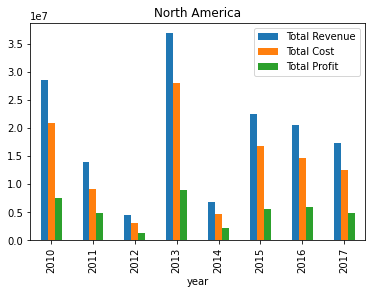

In [ ]:
CA_C.groupby(['year'])[['Total Revenue','Total Cost', 'Total Profit']].sum().plot(kind='bar', title='Central America and the Caribbean')
EU.groupby(['year'])[['Total Revenue','Total Cost', 'Total Profit']].sum().plot(kind='bar', title='Europe')
Asia.groupby(['year'])[['Total Revenue','Total Cost', 'Total Profit']].sum().plot(kind='bar', title='Asia')
ME_NA.groupby(['year'])[['Total Revenue','Total Cost', 'Total Profit']].sum().plot(kind='bar', title='Middle East and North Africa')
Aus_Ocean.groupby(['year'])[['Total Revenue','Total Cost', 'Total Profit']].sum().plot(kind='bar', title='Australia and Oceania')
SSAf.groupby(['year'])[['Total Revenue','Total Cost', 'Total Profit']].sum().plot(kind='bar', title='Sub-Saharan Africa')
NA.groupby(['year'])[['Total Revenue','Total Cost', 'Total Profit']].sum().plot(kind='bar', title='North America')


# Machine Learning
Machine Learning을 통해서 전체 이익에 대한 학습을 시켰습니다.
지역, 국가, 물품, 판매량, 판매 가격 을 학습 요소로 사용했고 그 결과로 전체 이익에 대한 결과를 얻도록 학습을 했습니다.
학습결과로 80%에 정확도를 만들었습니다. 

In [ ]:
X = data[['Region','Country','Units Sold', 'Unit Price', 'Item Type']]
y = data['Total Profit']
X.head()

,Region,Country,Units Sold,Unit Price,Item Type
0,Central America and the Caribbean,Antigua and Barbuda,552,255.28,Baby Food
1,Central America and the Caribbean,Panama,2167,152.58,Snacks
2,Europe,Czech Republic,4778,47.45,Beverages
3,Asia,North Korea,9016,205.70,Cereal
4,Asia,Sri Lanka,7542,152.58,Snacks


In [ ]:
X = pd.get_dummies(X, prefix=['Region'], columns=['Region'])
X = pd.get_dummies(X, prefix=['Country'], columns=['Country'])
X = pd.get_dummies(X, prefix=['Item Type'], columns=['Item Type'])
X.head()

,Units Sold,Unit Price,Region_Asia,Region_Australia and Oceania,Region_Central America and the Caribbean,Region_Europe,Region_Middle East and North Africa,Region_North America,Region_Sub-Saharan Africa,Country_Afghanistan,Country_Albania,Country_Algeria,Country_Andorra,Country_Angola,Country_Antigua and Barbuda,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahrain,Country_Bangladesh,Country_Barbados,Country_Belarus,Country_Belgium,Country_Belize,Country_Benin,Country_Bhutan,Country_Bosnia and Herzegovina,Country_Botswana,Country_Brunei,Country_Bulgaria,Country_Burkina Faso,Country_Burundi,Country_Cambodia,Country_Cameroon,Country_Canada,Country_Cape Verde,Country_Central African Republic,Country_Chad,Country_China,...,Country_Sweden,Country_Switzerland,Country_Syria,Country_Taiwan,Country_Tajikistan,Country_Tanzania,Country_Thailand,Country_The Bahamas,Country_The Gambia,Country_Togo,Country_Tonga,Country_Trinidad and Tobago,Country_Tunisia,Country_Turkey,Country_Turkmenistan,Country_Tuvalu,Country_Uganda,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States of America,Country_Uzbekistan,Country_Vanuatu,Country_Vatican City,Country_Vietnam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Item Type_Baby Food,Item Type_Beverages,Item Type_Cereal,Item Type_Clothes,Item Type_Cosmetics,Item Type_Fruits,Item Type_Household,Item Type_Meat,Item Type_Office Supplies,Item Type_Personal Care,Item Type_Snacks,Item Type_Vegetables
0,552,255.28,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2167,152.58,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,4778,47.45,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,9016,205.70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,7542,152.58,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

LR = LinearRegression()
LR.fit(X_train, y_train)
y_prediction =  LR.predict(X_test)
y_prediction

array([  53617.4375,   77269.5   ,  614174.6875, ..., -277029.6875,
        -45469.8125,   94368.3125])

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting the accuracy score
score=r2_score(y_test,y_prediction)

print('r2 socre is %.4f'%score)
print('root_mean_squared error of is %.2f'%np.sqrt(mean_squared_error(
    y_test, y_prediction)))

r2 socre is 0.8042
root_mean_squared error of is 169746.69
